<a href="https://colab.research.google.com/github/tuananh1006/Probability/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data=load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
import pandas as pd
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df_merge=pd.merge(df,pd.DataFrame(data.target,columns=['target']),left_index=True,right_index=True)

In [ ]:
df_merge

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
corr=df_merge.corr()

In [ ]:
corr['target'].sort_values(ascending=False)

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


In [ ]:
threshold = 0.75  # Set your desired threshold here
selected_features = corr[abs(corr['target']) > threshold]['target'].index

array([[<Axes: xlabel='mean concave points', ylabel='mean concave points'>,
        <Axes: xlabel='worst radius', ylabel='mean concave points'>,
        <Axes: xlabel='worst perimeter', ylabel='mean concave points'>,
        <Axes: xlabel='worst concave points', ylabel='mean concave points'>,
        <Axes: xlabel='target', ylabel='mean concave points'>],
       [<Axes: xlabel='mean concave points', ylabel='worst radius'>,
        <Axes: xlabel='worst radius', ylabel='worst radius'>,
        <Axes: xlabel='worst perimeter', ylabel='worst radius'>,
        <Axes: xlabel='worst concave points', ylabel='worst radius'>,
        <Axes: xlabel='target', ylabel='worst radius'>],
       [<Axes: xlabel='mean concave points', ylabel='worst perimeter'>,
        <Axes: xlabel='worst radius', ylabel='worst perimeter'>,
        <Axes: xlabel='worst perimeter', ylabel='worst perimeter'>,
        <Axes: xlabel='worst concave points', ylabel='worst perimeter'>,
        <Axes: xlabel='target', ylabel='w

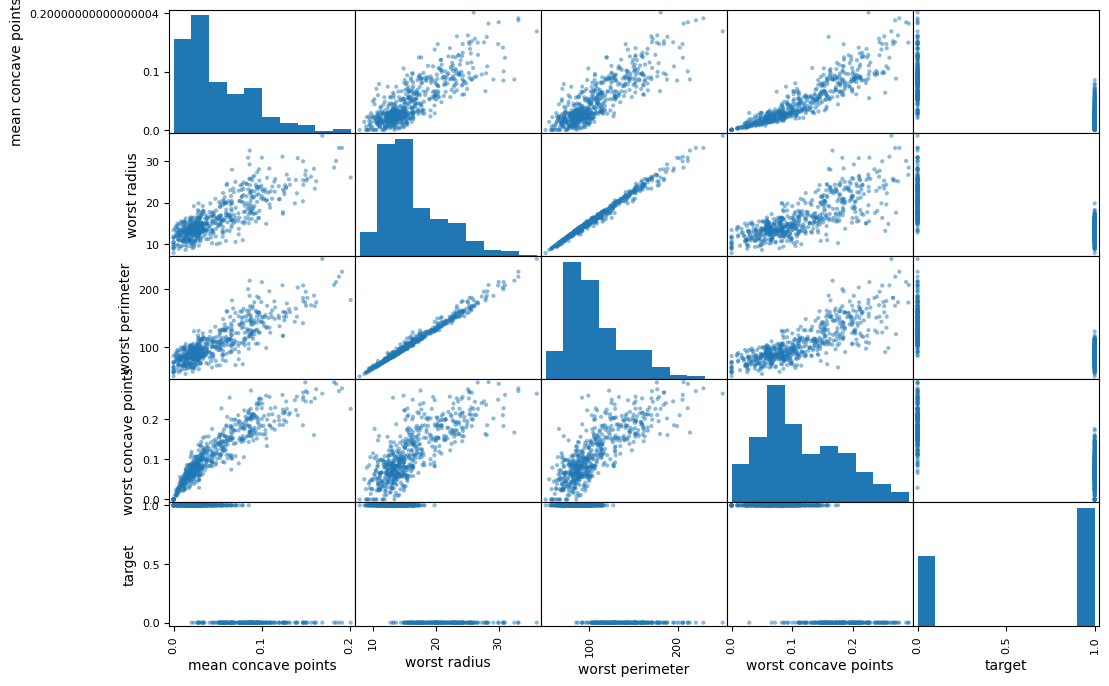

In [ ]:
from pandas.plotting import scatter_matrix
attribute=['target','smoothness error','mean fractal dimension','texture error','symmetry error']
scatter_matrix(df_merge[selected_features],figsize=(12,8))


In [ ]:
X_features=df_merge[selected_features].drop('target',axis=1)
y_target=df_merge['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
  clf.fit(X_train,y_train)
  y_predict=clf.predict(X_test)
  print('Accuracy:{}'.format(accuracy_score(y_test,y_predict)))
  print('Precision Score:{}'.format(precision_score(y_test,y_predict)))
  print('Recall Score:{}'.format(recall_score(y_test,y_predict)))
  print('F1 Score:{}'.format(f1_score(y_test,y_predict)))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(solver='liblinear')
print_score(lr_clf,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9415204678362573
Precision Score:0.9298245614035088
Recall Score:0.9814814814814815
F1 Score:0.954954954954955


In [ ]:
from sklearn.svm import SVC
lr_clf=SVC(kernel='linear',C=10)
print_score(lr_clf,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9707602339181286
Precision Score:0.9724770642201835
Recall Score:0.9814814814814815
F1 Score:0.9769585253456221


In [ ]:
from sklearn.ensemble import RandomForestClassifier
lr_clf=RandomForestClassifier()
print_score(lr_clf,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9590643274853801
Precision Score:0.954954954954955
Recall Score:0.9814814814814815
F1 Score:0.9680365296803652


In [ ]:
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression(solver='liblinear')
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10)
svp=SVC(kernel='poly')
svr=SVC(kernel='rbf')
evc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc),('svr',svr),('svp',svp)],voting='hard')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9590643274853801
Precision Score:0.9469026548672567
Recall Score:0.9907407407407407
F1 Score:0.9683257918552036


In [ ]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10)
svp=SVC(kernel='poly')
svr=SVC(kernel='rbf')
evc=VotingClassifier(estimators=[('rf',rf),('svc',svc),('svr',svr),('svp',svp)],voting='hard')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9636363636363636
Recall Score:0.9814814814814815
F1 Score:0.9724770642201835


In [ ]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10)
svp=SVC(kernel='poly')
svr=SVC(kernel='rbf')
evc=VotingClassifier(estimators=[('rf',rf),('svc',svc),('svp',svp)],voting='hard')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9707602339181286
Precision Score:0.963963963963964
Recall Score:0.9907407407407407
F1 Score:0.9771689497716894


In [ ]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10,probability=True)
svp=SVC(kernel='poly',probability=True)
svr=SVC(kernel='rbf',probability=True)
evc=VotingClassifier(estimators=[('rf',rf),('svc',svc),('svp',svp)],voting='soft')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9707602339181286
Precision Score:0.963963963963964
Recall Score:0.9907407407407407
F1 Score:0.9771689497716894


In [ ]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10,probability=True)
svp=SVC(kernel='poly',probability=True)
svr=SVC(kernel='rbf',probability=True)
evc=VotingClassifier(estimators=[('rf',rf),('svp',svp)],voting='soft')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9636363636363636
Recall Score:0.9814814814814815
F1 Score:0.9724770642201835


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9590643274853801
Precision Score:0.954954954954955
Recall Score:0.9814814814814815
F1 Score:0.9680365296803652


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=500,random_state=42)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9636363636363636
Recall Score:0.9814814814814815
F1 Score:0.9724770642201835


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9811320754716981
Recall Score:0.9629629629629629
F1 Score:0.9719626168224299


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100,bootstrap=False)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9473684210526315
Precision Score:0.9459459459459459
Recall Score:0.9722222222222222
F1 Score:0.958904109589041


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100,bootstrap=True,oob_score=True)

In [ ]:
evc.fit(X_train,y_train)
evc.oob_score_

0.9246231155778895

In [ ]:
evc.oob_decision_function_

array([[0.        , 1.        ],
       [0.06      , 0.94      ],
       [0.638     , 0.362     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.595     , 0.405     ],
       [0.4525    , 0.5475    ],
       [0.025     , 0.975     ],
       [0.55333333, 0.44666667],
       [0.09333333, 0.90666667],
       [0.01      , 0.99      ],
       [0.04      , 0.96      ],
       [0.93333333, 0.06666667],
       [1.        , 0.        ],
       [0.895     , 0.105     ],
       [0.385     , 0.615     ],
       [0.1075    , 0.8925    ],
       [1.        , 0.        ],
       [0.0075    , 0.9925    ],
       [1.        , 0.        ],
       [0.046     , 0.954     ],
       [0.068     , 0.932     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.94      , 0.06      ],
       [0.0875    , 0.9125    ],
       [0.01      , 0.99      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.23      , 0.77      ],
       [0.

In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100,max_features=2)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.935672514619883
Precision Score:0.944954128440367
Recall Score:0.9537037037037037
F1 Score:0.9493087557603687


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100,max_features=3)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9532163742690059
Precision Score:0.9629629629629629
Recall Score:0.9629629629629629
F1 Score:0.9629629629629629


In [ ]:
from sklearn.ensemble import BaggingClassifier
rf=RandomForestClassifier()
evc=BaggingClassifier(rf,n_estimators=5,random_state=42,max_samples=100,max_features=4)
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9811320754716981
Recall Score:0.9629629629629629
F1 Score:0.9719626168224299


In [ ]:
best_f1=0.9771689497716894

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=5)
print_score(rf,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9590643274853801
Precision Score:0.954954954954955
Recall Score:0.9814814814814815
F1 Score:0.9680365296803652


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=5)
print_score(rf,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9532163742690059
Precision Score:0.9545454545454546
Recall Score:0.9722222222222222
F1 Score:0.963302752293578


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
rf=ExtraTreesClassifier(n_estimators=1000,max_leaf_nodes=150)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
#

Accuracy:0.9649122807017544
Precision Score:0.9722222222222222
Recall Score:0.9722222222222222
F1 Score:0.9722222222222222


In [ ]:
selected_features[:-1]

Index(['mean concave points', 'worst radius', 'worst perimeter',
       'worst concave points'],
      dtype='object')

In [ ]:
#important features
rf.feature_importances_

array([0.23775177, 0.2208102 , 0.24016191, 0.30127611])

In [ ]:
for name,score in zip(selected_features[:-1],rf.feature_importances_):
  print(name,":",score)

mean concave points : 0.23775176978152032
worst radius : 0.22081020473017962
worst perimeter : 0.24016191340757329
worst concave points : 0.3012761120807268


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # You can use other base estimators

# Assuming you have X_train, X_test, y_train, y_test from previous code

# Create an AdaBoost classifier with a DecisionTreeClassifier as the base estimator
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=50,max_leaf_nodes=20),  # Adjust max_depth for the base estimator
    n_estimators=500,  # Number of weak learners
    learning_rate=0.4,  # Controls the contribution of each weak learner
    random_state=42  # For reproducibility
)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Evaluate the classifier (using your print_score function from before)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:0.9707602339181286
Precision Score:0.9724770642201835
Recall Score:0.9814814814814815
F1 Score:0.9769585253456221


In [ ]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10,probability=True)
svp=SVC(kernel='poly',probability=True)
svr=SVC(kernel='rbf',probability=True)
evc=VotingClassifier(estimators=[('svr',svp),('svc',svc),('ada',ada_clf)],voting='hard')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:0.9707602339181286
Precision Score:0.963963963963964
Recall Score:0.9907407407407407
F1 Score:0.9771689497716894


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # You can use other base estimators

# Assuming you have X_train, X_test, y_train, y_test from previous code

# Create an AdaBoost classifier with a DecisionTreeClassifier as the base estimator
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=50,max_leaf_nodes=20),  # Adjust max_depth for the base estimator
    n_estimators=500,  # Number of weak learners
    learning_rate=0.4,  # Controls the contribution of each weak learner
    random_state=42,  # For reproducibility
    algorithm='SAMME.R'
)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Evaluate the classifier (using your print_score function from before)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:0.9707602339181286
Precision Score:0.9724770642201835
Recall Score:0.9814814814814815
F1 Score:0.9769585253456221


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # You can use other base estimators

# Assuming you have X_train, X_test, y_train, y_test from previous code

# Create an AdaBoost classifier with a DecisionTreeClassifier as the base estimator
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=50,max_leaf_nodes=20),  # Adjust max_depth for the base estimator
    n_estimators=500,  # Number of weak learners
    learning_rate=0.35,  # Controls the contribution of each weak learner
    random_state=42,  # For reproducibility
    algorithm='SAMME.R'
)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Evaluate the classifier (using your print_score function from before)
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:0.9707602339181286
Precision Score:0.9724770642201835
Recall Score:0.9814814814814815
F1 Score:0.9769585253456221


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.4)
model.fit(X_train,y_train)
print_score(model,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9415204678362573
Precision Score:0.9537037037037037
Recall Score:0.9537037037037037
F1 Score:0.9537037037037037


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_reg1=DecisionTreeClassifier(max_depth=9)
tree_reg1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y2=y_train-model.predict(X_train)


In [ ]:
tree_reg2=DecisionTreeClassifier(max_depth=9)
tree_reg2.fit(X_train,y2)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y3=y2-tree_reg2.predict(X_train)
tree_reg3=DecisionTreeClassifier(max_depth=9)
tree_reg3.fit(X_train,y3)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred=sum(tree.predict(X_train) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_train)

1.0

In [ ]:
y_train.iloc[0]

1

In [ ]:
tree_reg1.predict([X_train.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
tree_reg2.predict([X_train.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
tree_reg3.predict([X_train.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
gbrt=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.4,max_depth=9)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=9, n_estimators=1000)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
gbrt=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.4,max_depth=9)
gbrt.fit(X_train,y_train)
errors=[mean_squared_error(y_train,y_pred) for y_pred in gbrt.staged_predict(X_train)]
best_n_estimators=np.argmin(errors)+1
gbrt_best=GradientBoostingClassifier(n_estimators=best_n_estimators,max_depth=9)
print_score(gbrt_best,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.631578947368421
Precision Score:0.631578947368421
Recall Score:1.0
F1 Score:0.7741935483870968


In [ ]:
#Early Stopping
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stoppin

In [ ]:
print(gbrt.n_estimators)


32


In [ ]:
print("Minimum validation MSE:", min_val_error)


Minimum validation MSE: 0.03962798566188988


In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [ ]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
  clf.fit(X_train,y_train)
  y_predict=clf.predict(X_test)
  print('Accuracy:{}'.format(accuracy_score(y_test,y_predict)))
  print('Precision Score:{}'.format(precision_score(y_test,y_predict)))
  print('Recall Score:{}'.format(recall_score(y_test,y_predict)))
  print('F1 Score:{}'.format(f1_score(y_test,y_predict)))

In [ ]:
xgb_reg = xgboost.XGBClassifier(random_state=42)

In [ ]:
print_score(xgb_reg,X_train,X_test,y_train,y_test,train=True)


Accuracy:0.9473684210526315
Precision Score:0.9541284403669725
Recall Score:0.9629629629629629
F1 Score:0.9585253456221198


In [ ]:
rf=RandomForestClassifier()
svc=SVC(kernel='linear',C=10,probability=True)
svp=SVC(kernel='poly',probability=True)
svr=SVC(kernel='rbf',probability=True)
evc1=VotingClassifier(estimators=[('rf',rf),('svp',svp)],voting='soft')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
rf=ExtraTreesClassifier(n_estimators=1000,max_leaf_nodes=150)
svp=SVC(kernel='poly')
svr=SVC(kernel='rbf')
evc2=VotingClassifier(estimators=[('xgb',xgb_reg),('rf',rf),('evc1',evc1)],voting='soft')
print_score(evc,X_train,X_test,y_train,y_test,train=True)

Accuracy:0.9649122807017544
Precision Score:0.9636363636363636
Recall Score:0.9814814814814815
F1 Score:0.9724770642201835
